In [4]:
#넷째마당 대중교통 데이터 프로젝트
import csv

f=open('subwayfee.csv')
data=csv.reader(f)
header=next(data)

for row in data:
    for i in range(4,8):
        row[i]=int(row[i].replace(",",""))
    print(row)

['20-Aug', '1호선', '1', '서울역', 868817, 831427, 142312, 133674]
['20-Aug', '1호선', '10', '동묘앞', 100373, 105911, 104373, 105305]
['20-Aug', '1호선', '2', '시청', 398000, 400278, 61177, 59104]
['20-Aug', '1호선', '3', '종각', 708749, 698507, 109905, 102839]
['20-Aug', '1호선', '4', '종로3가', 377954, 355686, 239610, 226630]
['20-Aug', '1호선', '5', '종로5가', 309584, 320772, 194856, 186994]
['20-Aug', '1호선', '6', '동대문', 182969, 184632, 89727, 91067]
['20-Aug', '1호선', '7', '신설동', 229665, 229554, 87162, 83945]
['20-Aug', '1호선', '8', '제기동', 194286, 189111, 199900, 214463]
['20-Aug', '1호선', '9', '청량리(서울시립대입구)', 289923, 283383, 214300, 219350]
['20-Aug', '2호선', '11', '시청', 452342, 448649, 39799, 35603]
['20-Aug', '2호선', '12', '을지로입구', 792709, 814822, 75425, 70757]
['20-Aug', '2호선', '13', '을지로3가', 398865, 399254, 57008, 55525]
['20-Aug', '2호선', '14', '을지로4가', 208125, 206427, 69048, 66425]
['20-Aug', '2호선', '15', '동대문역사문화공원(DDP)', 235140, 263325, 38130, 39969]
['20-Aug', '2호선', '16', '신당', 252396, 258180, 73105, 75

In [21]:
# 유임 승차 비율이 가장 높은 역은?
# rate = 유임/무임
import csv

f=open('subwayfee.csv')
data=csv.reader(f)
header=next(data)

rate=0
max_rate=0
max_station=''

for row in data:
    #쉼표 삭제, int 변환
    for i in range(4,8):
        row[i]=int(row[i].replace(",",""))
    #무임 0아니고 합쳐서 10만 넘는 경우 중
    if row[6]!=0 and row[4]+row[6]>100000: 
        rate=row[4]/(row[4]+row[6])
        if max_rate<rate:
            max_rate=rate
            max_station=row[1]+" "+row[3]
            
print(max_station,round(max_rate*100,2)) # round : rate를 소수점 2쨰자리까지 반올림
       

공항철도 1호선 마곡나루(서울식물원) 95.2


In [27]:
#유무임 승하차 인원이 가장 많은 역(4가지)
import csv

f=open('subwayfee.csv')
data=csv.reader(f)
header=next(data)

max_pop=[0]*4 # 유승, 유하, 무승, 무하
max_station=[""]*4
label=["유임승차",'유임하차','무임승차','무임하차']

for row in data:
    #쉼표 삭제, int 변환
    for i in range(4,8):
        row[i]=int(row[i].replace(",",""))
        if max_pop[i-4]<row[i]:
            max_pop[i-4]=row[i]
            max_station[i-4]=row[3]+" "+row[1] #역 이름, 호선

for i in range(4):
    print(label[i]+" : "+max_station[i],max_pop[i])

유임승차 : 강남 2호선 1926255
유임하차 : 강남 2호선 1962805
무임승차 : 종로3가 1호선 239610
무임하차 : 종로3가 1호선 226630


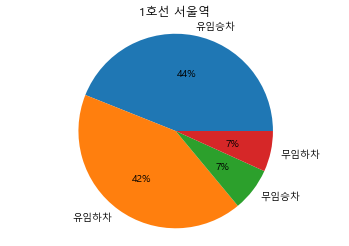

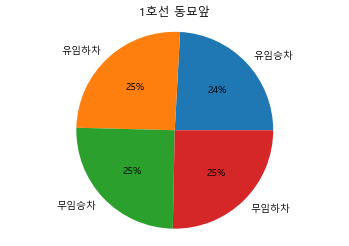

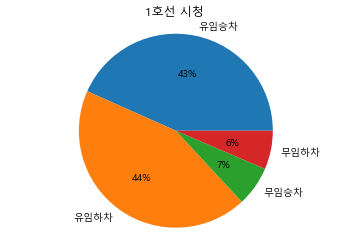

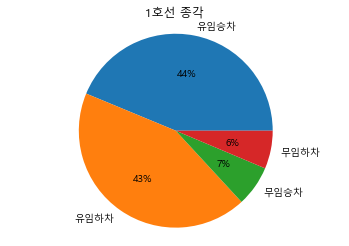

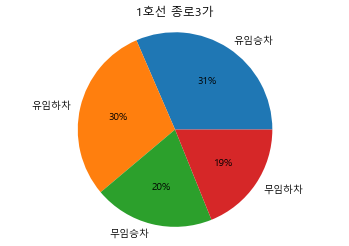

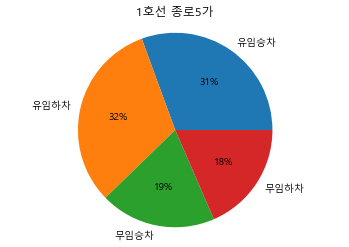

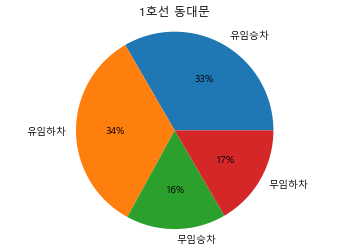

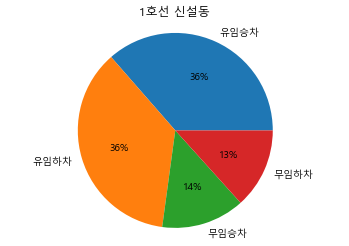

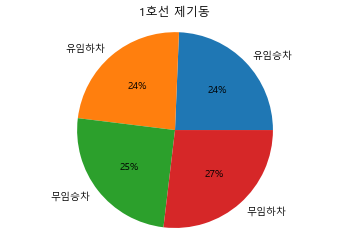

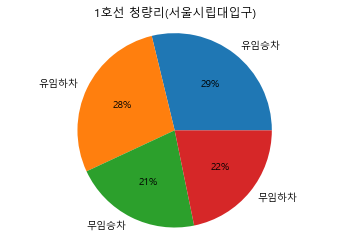

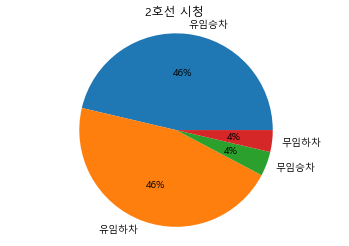

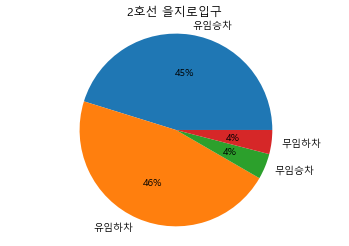

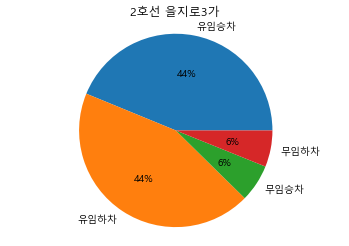

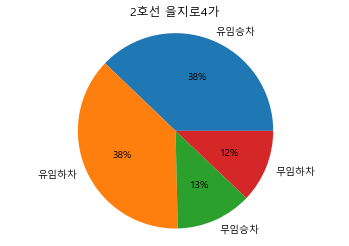

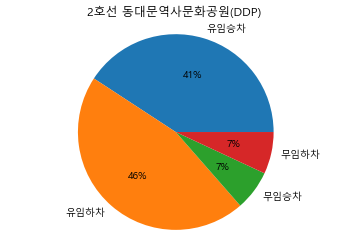

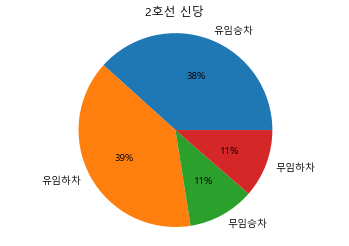

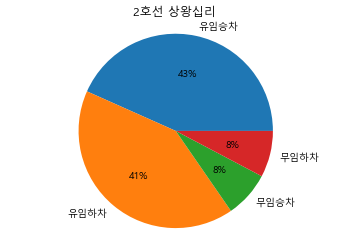

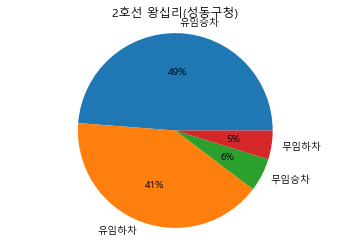

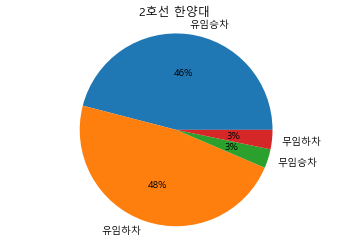

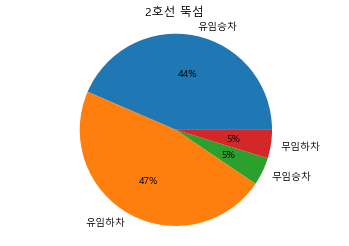

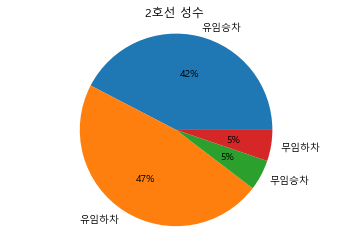

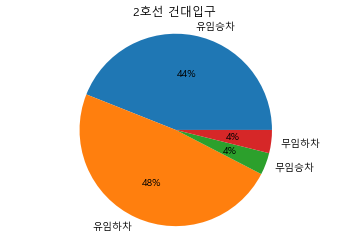

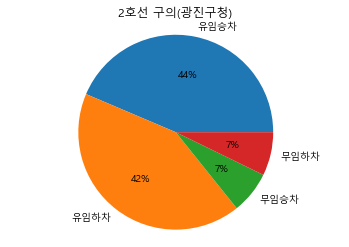

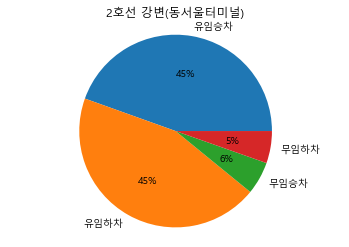

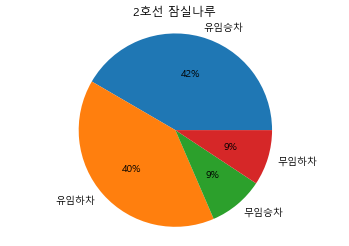

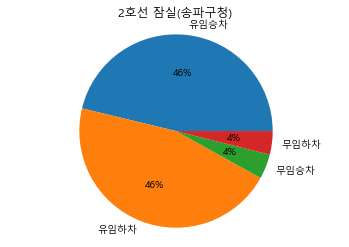

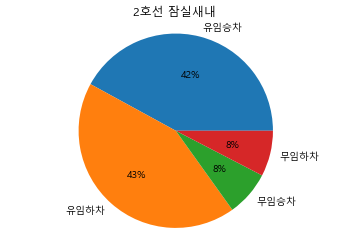

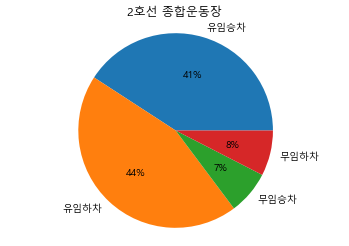

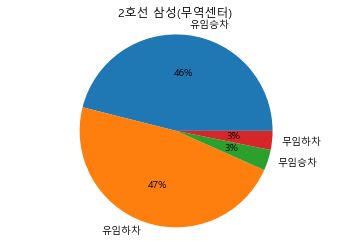

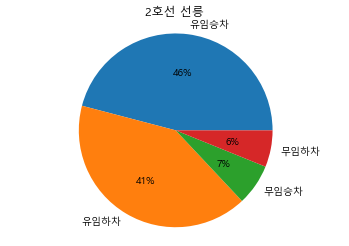

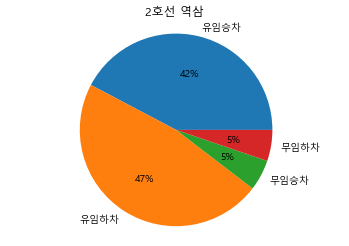

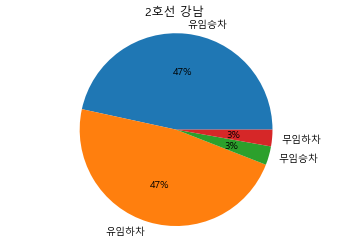

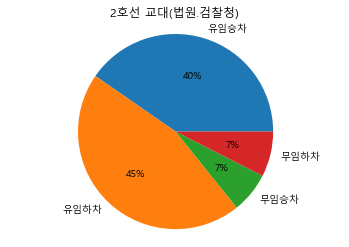

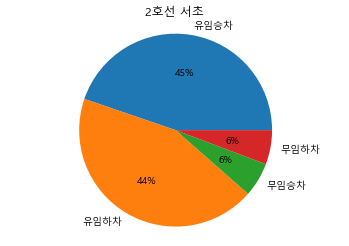

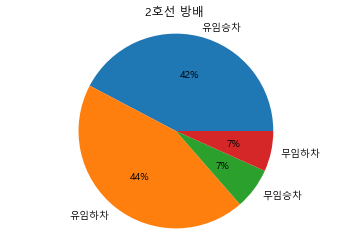

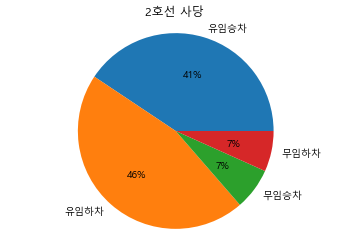

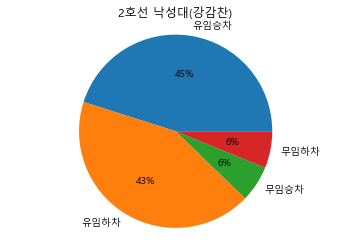

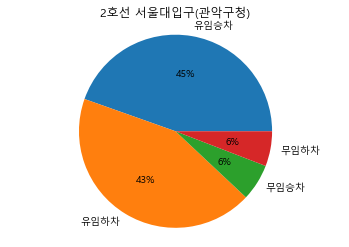

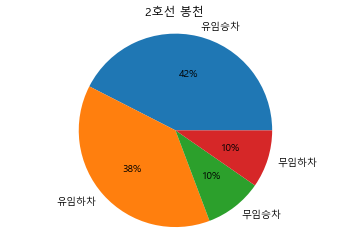

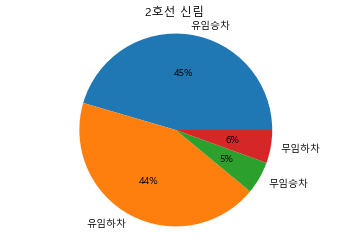

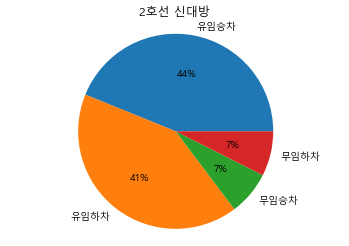

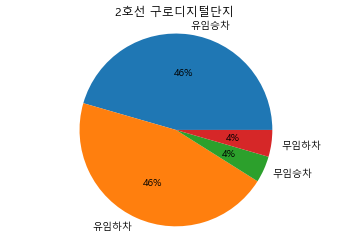

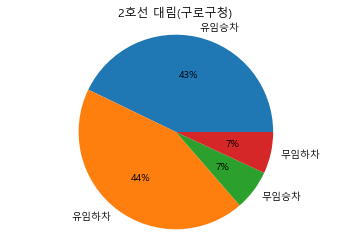

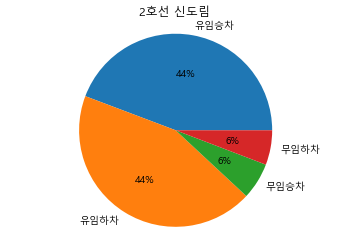

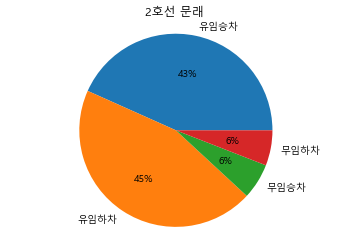

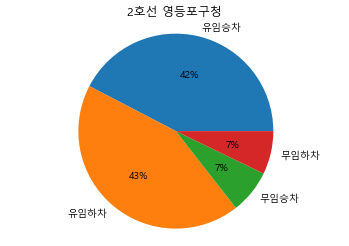

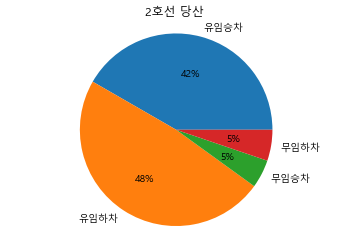

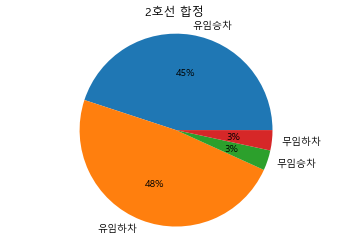

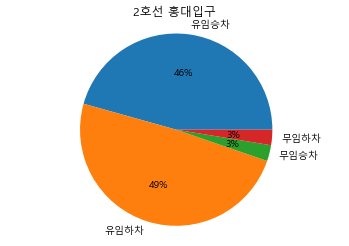

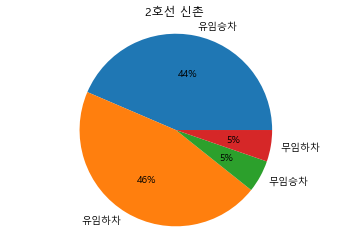

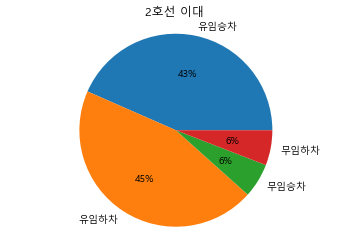

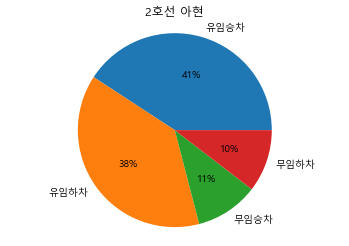

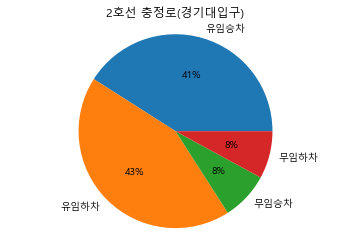

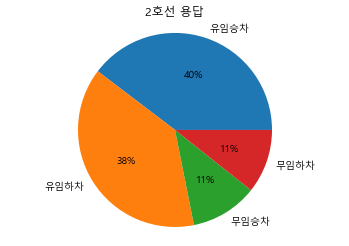

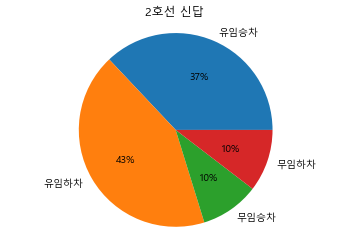

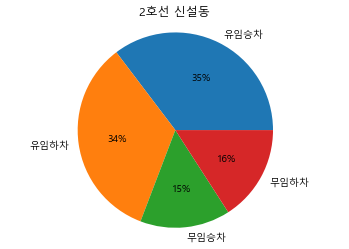

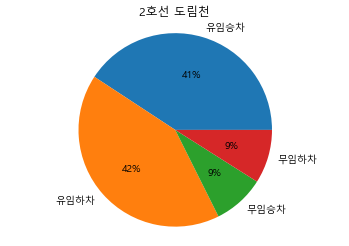

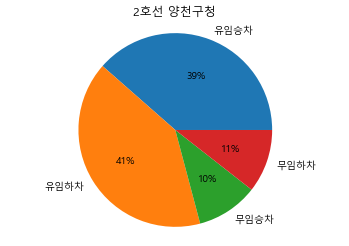

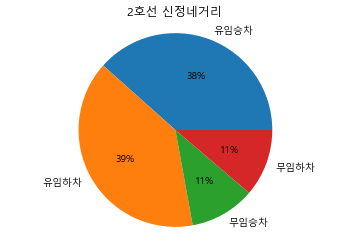

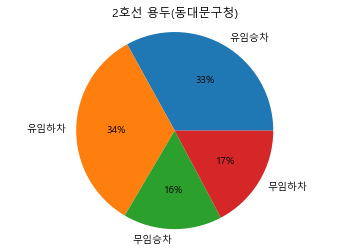

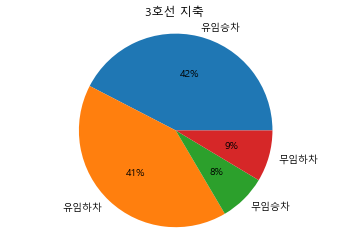

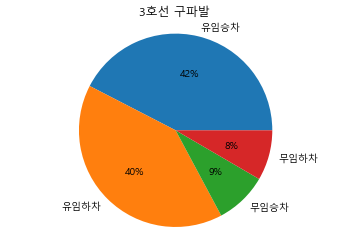

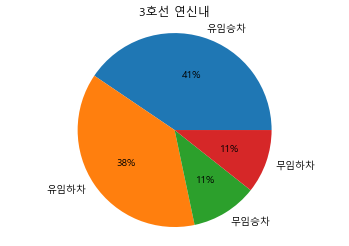

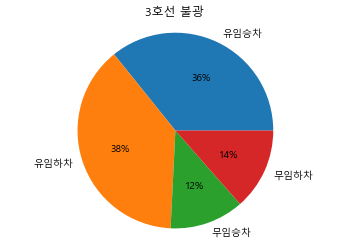

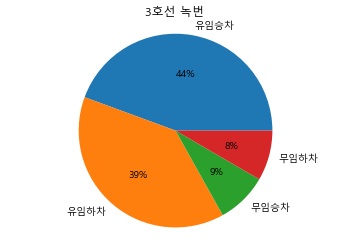

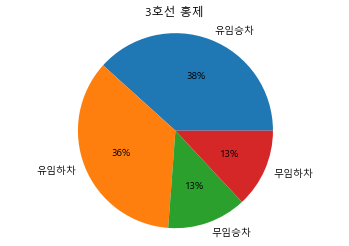

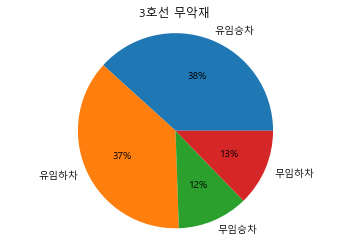

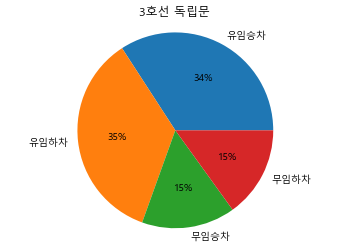

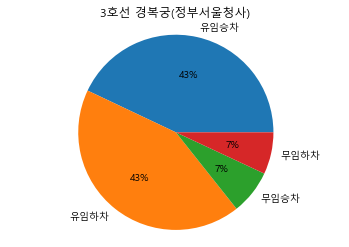

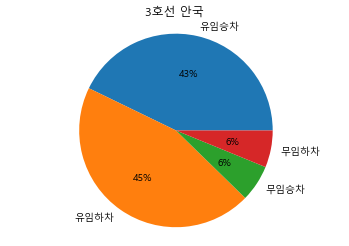

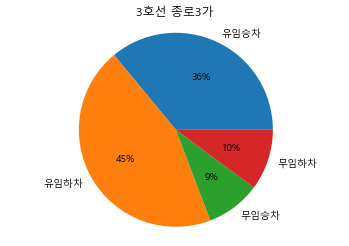

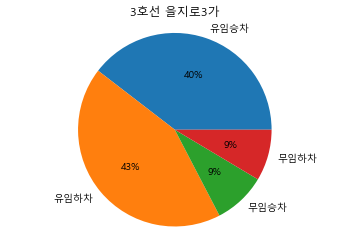

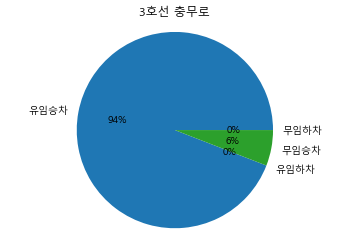

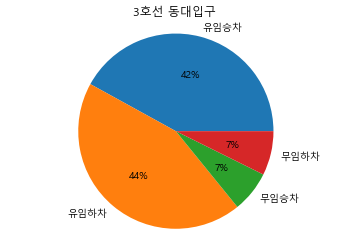

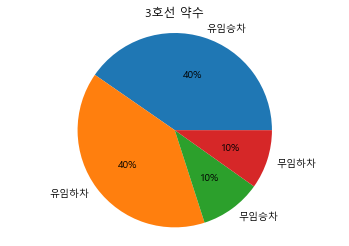

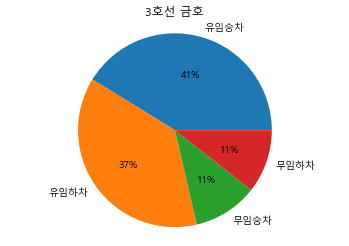

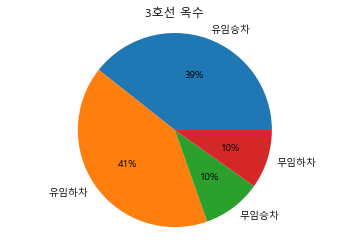

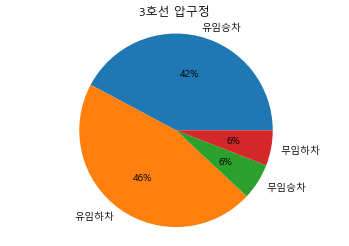

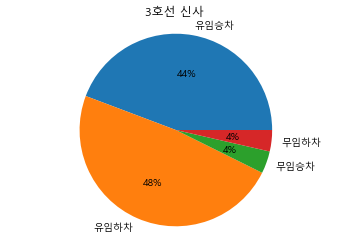

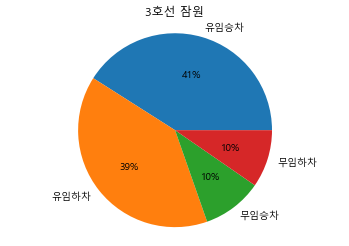

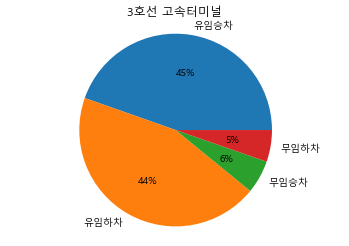

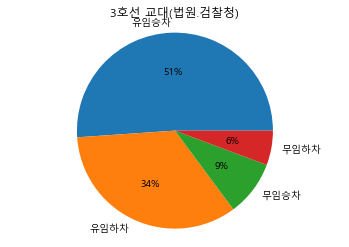

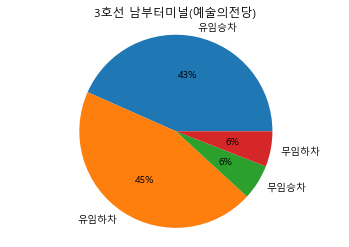

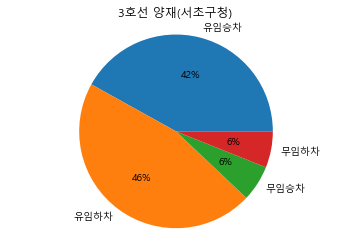

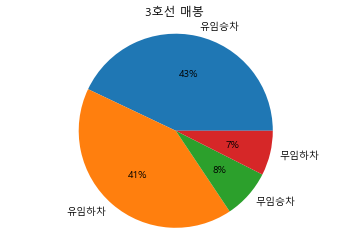

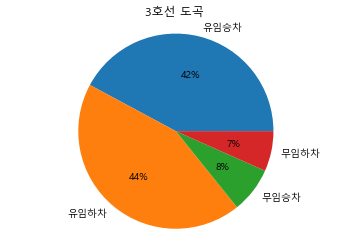

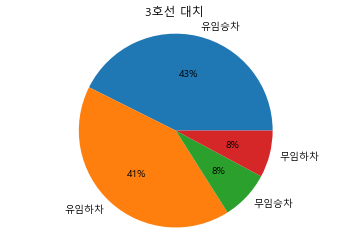

KeyboardInterrupt: 

In [29]:
# 모든역의 유무임 승하차 비율
import csv
import matplotlib.pyplot as plt

f=open('subwayfee.csv')
data=csv.reader(f)
header=next(data)

label=["유임승차",'유임하차','무임승차','무임하차']

plt.rc('font',family='Malgun Gothic')
for row in data:
    #쉼표 삭제, int 변환
    for i in range(4,8):
        row[i]=int(row[i].replace(",",""))
    #pie chart
    plt.title(row[1]+" "+row[3])
    plt.pie(row[4:8], labels=label, autopct='%1.f%%')
    plt.axis('equal')
    #plt.savefig(row[1]+" "+row[3]+".png") # 그래프이미지 파일로 저장
    plt.show()